In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import string
import os
from timeit import default_timer as timer

base="../../data/clean/"
pd.set_option('display.max_rows', 150)

In [2]:
targets = pd.read_csv(base+"filtered_nonlog_target.csv").iloc[:,1:]
targets

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
1,Armidale Regional,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
2,Ballina,255.7125,321.4001,504.3870,154.8351,795.2893,152.4891
3,Bathurst Regional,438.7931,462.3841,686.4989,200.5237,1184.2695,226.4738
4,Bayside,315.9874,274.1388,728.4085,85.5167,584.6676,108.5638
5,Bega Valley,312.2606,341.7192,318.1524,153.1845,810.1102,153.1845
6,Bellingen,279.2213,263.7090,248.1967,116.3422,604.9794,93.0738
7,Berrigan,174.9883,139.9907,163.3224,81.6612,699.9533,279.9813
8,Blacktown,594.3767,453.1188,821.0799,163.9858,980.7504,148.7380
9,Bland,348.2010,315.0390,281.8770,215.5530,746.1449,381.3630


In [3]:
crimes = targets.columns[1:]
crimes

Index(['Assault - domestic violence', 'Assault - non-domestic violence',
       'Fraud', 'Sexual Offences', 'Malicious damage to property',
       'Prohibited weapons offences'],
      dtype='object')

In [4]:
tfidf_preds=pd.read_csv(os.path.join(base, 'tfidf_by_lga_and_time_of_day_2016_rfr_preds.csv'))
tfidf_preds

,LGA,TF-IDF Assault - domestic violence,TF-IDF Assault - non-domestic violence,TF-IDF Fraud,TF-IDF Sexual Offences,TF-IDF Malicious damage to property,TF-IDF Prohibited weapons offences
0,Albury,477.301873,418.397087,584.012860,196.170292,1124.752268,231.835807
1,Armidale Regional,460.727393,391.841167,425.435200,196.414083,1003.058845,231.269322
2,Ballina,468.255328,433.765488,576.674090,220.255568,1032.020485,239.359978
3,Bathurst Regional,556.570488,434.045633,522.160865,229.290217,1013.712130,251.559590
4,Bayside,259.215042,280.906430,592.332382,106.876427,540.547368,109.994835
5,Bega Valley,429.363977,498.807597,465.062662,203.617620,1033.803275,219.865595
6,Bellingen,405.233698,416.211653,346.964275,225.030533,879.991630,308.142215
7,Berrigan,536.937372,451.544765,401.050937,211.007365,971.784085,316.459325
8,Blacktown,345.790888,320.093980,504.609503,144.208582,695.388555,154.947338
9,Bland,602.418592,417.884093,259.077642,208.489933,989.414680,337.289963


In [125]:
opal_preds = pd.read_csv(os.path.join(base, 'opal_predictions.csv'))
opal_preds = targets[['LGA']].merge(opal_preds,left_on='LGA',right_on='lga',how='left')
opal_cols = opal_preds.columns[-6:].tolist()
new_cols = ['Opal ' + name[:-6] for name in opal_cols]
opal_preds = opal_preds[['LGA']+opal_cols]
opal_preds.columns = ['LGA'] + new_cols
opal_preds = opal_preds.fillna(opal_preds.median())
opal_preds

,LGA,Opal Assault - domestic violence,Opal Assault - non-domestic violence,Opal Fraud,Opal Sexual Offences,Opal Malicious damage to property,Opal Prohibited weapons offences
0,Albury,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
1,Armidale Regional,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
2,Ballina,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
3,Bathurst Regional,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
4,Bayside,240.04683,251.44485,957.07532,118.53787,669.48002,102.41664
5,Bega Valley,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
6,Bellingen,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
7,Berrigan,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
8,Blacktown,448.68270,369.00774,765.48802,111.35508,601.79515,150.18557
9,Bland,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378


In [123]:
opal_preds.median()

Opal Assault - domestic violence        268.09121
Opal Assault - non-domestic violence    290.35682
Opal Fraud                              667.46089
Opal Sexual Offences                    111.35508
Opal Malicious damage to property       565.22550
Opal Prohibited weapons offences        108.66378
dtype: float64

In [127]:
derived = pd.read_csv(os.path.join(base, 'twitter_17_features.csv'))
derived = derived.rename(columns={'lga': 'LGA'})
derived

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_pcapita,Polr_Neg_N_pcapita,Polr_Neg_E_pcapita,Polr_Neg_M_pcapita,Night_pcapita,Morning_pcapita,Afternoon_pcapita,Evening_pcapita,Prof_exists_pcapita,tr_tweeters,ja_tweeters,in_tweeters,tl_tweeters
0,Woollahra,0.000000,0.001180,348,0.621871,-3.698370e-04,-0.000593,-0.000321,-0.000831,0.017662,0.024631,0.015431,0.012242,0.000922,1,0,2,3
1,Camden,0.376190,0.000575,210,0.861029,-5.940000e-05,-0.000135,-0.000083,-0.000101,0.005127,0.006968,0.002007,0.003286,0.000102,0,2,0,1
2,Albury,0.339355,0.006304,775,0.316016,-2.668738e-03,-0.007370,-0.004476,-0.008072,0.128044,0.152263,0.045873,0.083836,0.024101,4,3,26,29
3,North Sydney,0.021667,0.002468,600,0.271039,-2.515400e-04,-0.001465,-0.001000,-0.003199,0.032162,0.064102,0.004818,0.021505,0.003326,1,3,11,13
4,Central Coast,0.423130,0.004034,3597,0.415482,-1.442578e-03,-0.002636,-0.001770,-0.004374,0.063624,0.091702,0.030927,0.045790,0.007695,25,13,89,129
5,Fairfield,0.108527,0.000121,129,0.685430,-5.920000e-06,-0.000015,-0.000007,-0.000016,0.000679,0.000503,0.000070,0.000267,0.000030,1,0,1,0
6,Temora,0.239130,0.002946,46,0.714286,-4.090000e-05,-0.000385,-0.000062,-0.000291,0.008347,0.008183,0.001146,0.002946,0.000000,0,0,1,0
7,Cobar,0.354167,0.002798,48,0.779412,-5.600990e-04,-0.000097,-0.000579,-0.001142,0.018076,0.035076,0.016785,0.017861,0.000646,0,0,2,0
8,Lithgow,0.599415,0.003035,342,0.577253,-3.100381e-03,-0.003576,-0.001902,-0.003767,0.080322,0.083784,0.025699,0.036984,0.011996,2,1,5,7
9,Glen Innes Severn,0.477612,0.001245,67,0.554392,-5.656030e-04,-0.001579,-0.000404,-0.004404,0.065980,0.082390,0.019466,0.026709,0.003508,1,0,1,2


In [128]:
derived_features = derived.columns[1:]
derived = derived.merge(tfidf_preds, on='LGA')
derived = derived.sort_values(by=['LGA'])
derived

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_pcapita,Polr_Neg_N_pcapita,Polr_Neg_E_pcapita,Polr_Neg_M_pcapita,Night_pcapita,...,tr_tweeters,ja_tweeters,in_tweeters,tl_tweeters,TF-IDF Assault - domestic violence,TF-IDF Assault - non-domestic violence,TF-IDF Fraud,TF-IDF Sexual Offences,TF-IDF Malicious damage to property,TF-IDF Prohibited weapons offences
2,Albury,0.339355,0.006304,775,0.316016,-2.668738e-03,-0.007370,-0.004476,-0.008072,0.128044,...,4,3,26,29,477.301873,418.397087,584.012860,196.170292,1124.752268,231.835807
108,Armidale Regional,0.375817,0.003362,306,0.514424,-1.420306e-03,-0.001944,-0.001170,-0.004177,0.062039,...,0,1,5,5,460.727393,391.841167,425.435200,196.414083,1003.058845,231.269322
99,Ballina,0.594556,0.003853,698,0.550613,-4.771620e-04,-0.001150,-0.000811,-0.001753,0.040608,...,0,4,10,10,468.255328,433.765488,576.674090,220.255568,1032.020485,239.359978
56,Bathurst Regional,0.476974,0.004383,608,0.444390,-5.426010e-04,-0.002403,-0.001372,-0.004298,0.047240,...,0,1,4,7,556.570488,434.045633,522.160865,229.290217,1013.712130,251.559590
85,Bayside,0.042857,0.001538,770,0.265229,-1.429040e-04,-0.000496,-0.000353,-0.000652,0.009817,...,1,6,10,14,259.215042,280.906430,592.332382,106.876427,540.547368,109.994835
93,Bega Valley,0.482255,0.004511,479,0.607501,-3.962660e-04,-0.001393,-0.001108,-0.002086,0.046492,...,1,0,18,19,429.363977,498.807597,465.062662,203.617620,1033.803275,219.865595
44,Bellingen,0.556122,0.003237,196,0.838773,-2.228930e-04,-0.000827,-0.000857,-0.001145,0.040654,...,0,1,3,7,405.233698,416.211653,346.964275,225.030533,879.991630,308.142215
55,Berrigan,0.362745,0.003663,102,0.349639,-1.002788e-03,-0.002198,-0.000516,-0.002749,0.047034,...,1,0,5,2,536.937372,451.544765,401.050937,211.007365,971.784085,316.459325
100,Blacktown,0.060345,0.000258,348,0.380935,-4.140000e-05,-0.000051,-0.000039,-0.000161,0.002181,...,2,1,7,9,345.790888,320.093980,504.609503,144.208582,695.388555,154.947338
42,Bland,0.258065,0.001511,31,0.812766,-5.520570e-04,-0.001278,-0.000905,-0.001317,0.013266,...,0,0,0,0,602.418592,417.884093,259.077642,208.489933,989.414680,337.289963


In [129]:
derived = derived.merge(opal_preds, on='LGA')
derived

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_pcapita,Polr_Neg_N_pcapita,Polr_Neg_E_pcapita,Polr_Neg_M_pcapita,Night_pcapita,...,TF-IDF Fraud,TF-IDF Sexual Offences,TF-IDF Malicious damage to property,TF-IDF Prohibited weapons offences,Opal Assault - domestic violence,Opal Assault - non-domestic violence,Opal Fraud,Opal Sexual Offences,Opal Malicious damage to property,Opal Prohibited weapons offences
0,Albury,0.339355,0.006304,775,0.316016,-2.668738e-03,-0.007370,-0.004476,-0.008072,0.128044,...,584.012860,196.170292,1124.752268,231.835807,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
1,Armidale Regional,0.375817,0.003362,306,0.514424,-1.420306e-03,-0.001944,-0.001170,-0.004177,0.062039,...,425.435200,196.414083,1003.058845,231.269322,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
2,Ballina,0.594556,0.003853,698,0.550613,-4.771620e-04,-0.001150,-0.000811,-0.001753,0.040608,...,576.674090,220.255568,1032.020485,239.359978,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
3,Bathurst Regional,0.476974,0.004383,608,0.444390,-5.426010e-04,-0.002403,-0.001372,-0.004298,0.047240,...,522.160865,229.290217,1013.712130,251.559590,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
4,Bayside,0.042857,0.001538,770,0.265229,-1.429040e-04,-0.000496,-0.000353,-0.000652,0.009817,...,592.332382,106.876427,540.547368,109.994835,240.04683,251.44485,957.07532,118.53787,669.48002,102.41664
5,Bega Valley,0.482255,0.004511,479,0.607501,-3.962660e-04,-0.001393,-0.001108,-0.002086,0.046492,...,465.062662,203.617620,1033.803275,219.865595,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
6,Bellingen,0.556122,0.003237,196,0.838773,-2.228930e-04,-0.000827,-0.000857,-0.001145,0.040654,...,346.964275,225.030533,879.991630,308.142215,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
7,Berrigan,0.362745,0.003663,102,0.349639,-1.002788e-03,-0.002198,-0.000516,-0.002749,0.047034,...,401.050937,211.007365,971.784085,316.459325,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
8,Blacktown,0.060345,0.000258,348,0.380935,-4.140000e-05,-0.000051,-0.000039,-0.000161,0.002181,...,504.609503,144.208582,695.388555,154.947338,448.68270,369.00774,765.48802,111.35508,601.79515,150.18557
9,Bland,0.258065,0.001511,31,0.812766,-5.520570e-04,-0.001278,-0.000905,-0.001317,0.013266,...,259.077642,208.489933,989.414680,337.289963,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378


In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
derived[derived.columns[1:]] = scaler.fit_transform(derived[derived.columns[1:]])
derived

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_pcapita,Polr_Neg_N_pcapita,Polr_Neg_E_pcapita,Polr_Neg_M_pcapita,Night_pcapita,...,TF-IDF Fraud,TF-IDF Sexual Offences,TF-IDF Malicious damage to property,TF-IDF Prohibited weapons offences,Opal Assault - domestic violence,Opal Assault - non-domestic violence,Opal Fraud,Opal Sexual Offences,Opal Malicious damage to property,Opal Prohibited weapons offences
0,Albury,0.466554,0.416775,0.197563,0.287275,0.949488,0.782715,0.904756,0.838731,0.462604,...,0.617100,0.402778,0.362797,0.400878,0.383684,0.209029,0.276250,0.317617,0.491792,0.432588
1,Armidale Regional,0.516683,0.218445,0.075966,0.502525,0.973118,0.942828,0.975102,0.916538,0.222867,...,0.327164,0.403730,0.296145,0.399310,0.383684,0.209029,0.276250,0.317617,0.491792,0.432588
2,Ballina,0.817410,0.251528,0.177599,0.541787,0.990969,0.966247,0.982749,0.964972,0.145025,...,0.603682,0.496850,0.312008,0.421706,0.383684,0.209029,0.276250,0.317617,0.491792,0.432588
3,Bathurst Regional,0.655755,0.287248,0.154265,0.426547,0.989730,0.929267,0.970807,0.914123,0.169113,...,0.504013,0.532137,0.301980,0.455476,0.383684,0.209029,0.276250,0.317617,0.491792,0.432588
4,Bayside,0.058921,0.095517,0.196267,0.232176,0.997295,0.985543,0.992496,0.986980,0.033190,...,0.632311,0.054015,0.042826,0.063604,0.310372,0.152980,0.614819,0.368764,0.700100,0.386374
5,Bega Valley,0.663016,0.295896,0.120819,0.603503,0.992500,0.959067,0.976427,0.958316,0.166398,...,0.399617,0.431865,0.312984,0.367743,0.383684,0.209029,0.276250,0.317617,0.491792,0.432588
6,Bellingen,0.764571,0.210004,0.047446,0.854408,0.995781,0.975773,0.981771,0.977130,0.145192,...,0.183692,0.515500,0.228741,0.612106,0.383684,0.209029,0.276250,0.317617,0.491792,0.432588
7,Berrigan,0.498711,0.238779,0.023075,0.323752,0.981020,0.935332,0.989018,0.945081,0.168365,...,0.282582,0.460728,0.279016,0.635129,0.383684,0.209029,0.276250,0.317617,0.491792,0.432588
8,Blacktown,0.082964,0.009266,0.086855,0.357704,0.999216,0.998656,0.999174,0.996787,0.005456,...,0.471923,0.199827,0.127633,0.188039,0.855776,0.322319,0.390847,0.317617,0.564861,0.739750
9,Bland,0.354794,0.093728,0.004667,0.826193,0.989551,0.962460,0.980747,0.973679,0.045718,...,0.023005,0.450896,0.288672,0.692791,0.383684,0.209029,0.276250,0.317617,0.491792,0.432588


In [8]:
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# X must be a dataframe of input variables
# y must be a dataframe with one or more label columns, and last column of target.
# The first columns of y will be used as labels to return results.
def rfr_cv(X, y, folds=5, verbose=True, random_state=2018):
    assert len(X) == len(y)

    # Empty dataframe for predictions
    preds = pd.DataFrame(columns = y.columns)
    preds['predicted'] = 0
    importants = defaultdict(float)
    kf = KFold(n_splits=folds, shuffle=True, random_state=random_state)
    for train_index, test_index in kf.split(X):
        X_train_df, X_test_df = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_df, y_test_df = y.iloc[train_index,:], y.iloc[test_index,:].copy()
                
        model = RandomForestRegressor(random_state=random_state)
        model.fit(X_train_df, y_train_df.iloc[:,-1])
        
        # Save important features
        importances = model.feature_importances_
        for i in range(len(importances)):
            importants[X_train_df.columns[i]] += importances[i] / folds

        # Save predictions
        y_test_df['predicted'] = model.predict(X_test_df)
        preds = pd.concat([preds,y_test_df])
        
        if verbose:
            print('Finished processing',len(preds),'records...')

    return preds, importants

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def metrics(predictions, importants):
    print('MOST IMPORTANT FEATURES:')
    for w in sorted(importants, key=importants.get, reverse=True)[0:20]:
      print(w, importants[w])

    y = predictions.iloc[:,-2]
    pred = predictions.iloc[:,-1]
    print('R2:',r2_score(y,pred))
    print('RMSE:',np.sqrt(mean_squared_error(y,pred)))
    print('MAPE:',mape(y,pred))
    print('Mean APE Baseline:',mape(y,np.mean(y)))

    fig, ax = plt.subplots()
    ax.scatter(y, pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()


RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF.
Assault - domestic violence
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.1674390051048249 seconds
MOST IMPORTANT FEATURES:
TF-IDF Assault - domestic violence 0.209620891794
instagrammers_ratio 0.10800540105
total_tweeters 0.0731536151389
tl_tweeters 0.0647400209763
replyers_per_capita 0.0629753245099
Polr_Neg_N_pcapita 0.0558896577062
Morning_pcapita 0.0551867265483
link_tweets_ratio 0.0513822466181
Prof_exists_pcapita 0.0466374557896
Polr_Neg_E_pcapita 0.0443247873085
Polr_Neg_M_pcapita 0.0442981247715
Evening_pcapita 0.0405468211897
Polr_Neg_A_pcapita 0.0393620466329
Afternoon_pcapita 0.0374006615547
Night_pca

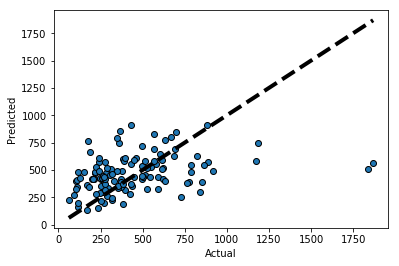

Assault - non-domestic violence
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.1707961200736463 seconds
MOST IMPORTANT FEATURES:
TF-IDF Assault - non-domestic violence 0.107427692495
instagrammers_ratio 0.104415448799
total_tweeters 0.0952353814241
Polr_Neg_A_pcapita 0.0832474974382
Morning_pcapita 0.0795485631996
replyers_per_capita 0.0716315538539
Evening_pcapita 0.0557782134922
in_tweeters 0.0521210655625
Afternoon_pcapita 0.0507452741852
Polr_Neg_M_pcapita 0.0453799536228
link_tweets_ratio 0.0448161563399
Night_pcapita 0.0422905795387
tl_tweeters 0.0408379159848
Polr_Neg_E_pcapita 0.0362524646826
Prof_exists_pcapita 0.0283127527554
Polr_Neg_N_pcapita 0.0

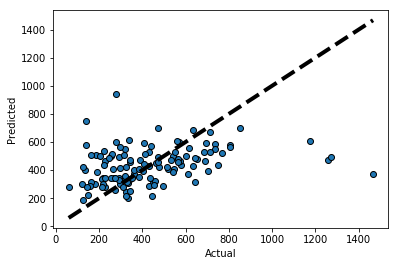

Fraud
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.17457386711612344 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.184261777915
TF-IDF Fraud 0.157241417258
total_tweeters 0.13382160618
tr_tweeters 0.0883956355162
ja_tweeters 0.0856820570904
tl_tweeters 0.0620671569295
replyers_per_capita 0.0439230087481
Polr_Neg_A_pcapita 0.0349084702629
link_tweets_ratio 0.0311502270917
in_tweeters 0.030635073079
Afternoon_pcapita 0.0291949088529
Prof_exists_pcapita 0.0241758233946
Evening_pcapita 0.0208850247618
Polr_Neg_N_pcapita 0.0177421693812
Night_pcapita 0.0170281545757
Morning_pcapita 0.0159030833972
Polr_Neg_E_pcapita 0.0121938037128
Polr_Neg_M_pcapita 0

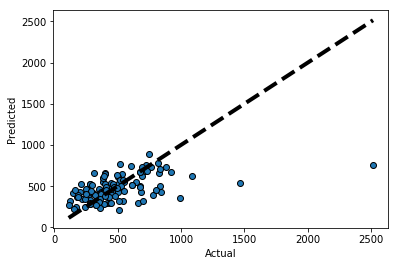

Sexual Offences
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.17434823606163263 seconds
MOST IMPORTANT FEATURES:
TF-IDF Sexual Offences 0.27855738814
instagrammers_ratio 0.115957044817
replyers_per_capita 0.102132457136
Night_pcapita 0.0662512121583
total_tweeters 0.0620028029524
link_tweets_ratio 0.0455240944291
Polr_Neg_N_pcapita 0.0451614754363
Prof_exists_pcapita 0.0442375893181
Polr_Neg_A_pcapita 0.0402910943643
Polr_Neg_E_pcapita 0.0402666058438
Evening_pcapita 0.0352849499467
Morning_pcapita 0.0270271495583
Afternoon_pcapita 0.0222836366189
tl_tweeters 0.0206812586649
Polr_Neg_M_pcapita 0.0195229232092
in_tweeters 0.0179334383893
ja_tweeters 0.008668

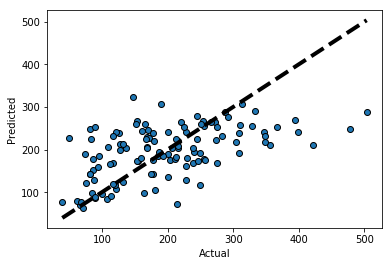

Malicious damage to property
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.16898107691667974 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.212748721258
TF-IDF Malicious damage to property 0.144615524314
Morning_pcapita 0.0884456412925
replyers_per_capita 0.0628515705789
tl_tweeters 0.0497891475968
Evening_pcapita 0.0488762782831
Polr_Neg_A_pcapita 0.0487390952425
link_tweets_ratio 0.047129435103
Night_pcapita 0.0451785840387
Afternoon_pcapita 0.0432157283711
Prof_exists_pcapita 0.0424985674523
total_tweeters 0.0354856432064
Polr_Neg_E_pcapita 0.035324496012
Polr_Neg_N_pcapita 0.0338260962644
Polr_Neg_M_pcapita 0.0258474671063
in_tweeters 0.02183975

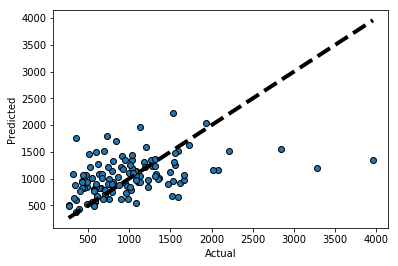

Prohibited weapons offences
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.16762680211104453 seconds
MOST IMPORTANT FEATURES:
TF-IDF Prohibited weapons offences 0.258624694317
total_tweeters 0.158090397086
instagrammers_ratio 0.118554714543
replyers_per_capita 0.0908412462642
tl_tweeters 0.067793989237
Polr_Neg_A_pcapita 0.0439945064989
Polr_Neg_N_pcapita 0.0307617301805
Night_pcapita 0.0296883361518
Afternoon_pcapita 0.029376236783
Prof_exists_pcapita 0.0266250480976
link_tweets_ratio 0.0262464824479
in_tweeters 0.0207997695063
Polr_Neg_E_pcapita 0.0203246719167
Morning_pcapita 0.0201277288246
Polr_Neg_M_pcapita 0.0199732578938
Evening_pcapita 0.01730319772

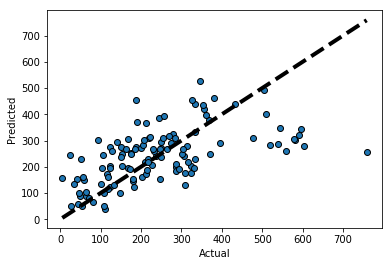

In [24]:
output = pd.DataFrame()
print('RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF.')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = derived_features.tolist() + ['TF-IDF '+crime]
    y_cols = ['LGA',crime]
    X = derived[X_cols]
    y = targets[y_cols]
    preds, importants = rfr_cv(X, y, folds=10)
    end = timer()
    print('Finished 10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    if len(output.columns) == 0:
        output['LGA'] = preds['LGA']
    output['TFIDF+DERIVED '+crime] = preds[preds.columns[-1]]

In [25]:
output.to_csv("../../data/clean/ensemble_tfidf_17_rfr_preds.csv",index=False)

RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF AND OPAL.
Assault - domestic violence
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.15831077098846436 seconds
MOST IMPORTANT FEATURES:
TF-IDF Assault - domestic violence 0.200750440053
instagrammers_ratio 0.110494968256
total_tweeters 0.073887997278
tl_tweeters 0.0607640415655
replyers_per_capita 0.0573818282731
Morning_pcapita 0.0559963191831
Polr_Neg_N_pcapita 0.0538741706199
link_tweets_ratio 0.0485573564122
Polr_Neg_M_pcapita 0.0461303779955
Polr_Neg_E_pcapita 0.0421530126429
Prof_exists_pcapita 0.0417421640957
Afternoon_pcapita 0.0396977185413
Polr_Neg_A_pcapita 0.0393757882725
Evening_pcapita 0.0372181596716

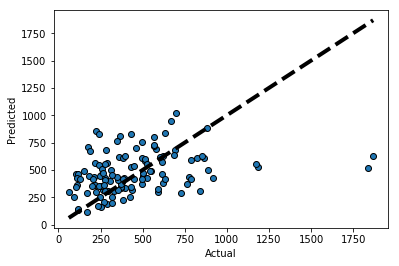

Assault - non-domestic violence
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.16545434505678713 seconds
MOST IMPORTANT FEATURES:
TF-IDF Assault - non-domestic violence 0.110941496379
instagrammers_ratio 0.103124017848
total_tweeters 0.0960612510376
Polr_Neg_A_pcapita 0.0808016923113
Morning_pcapita 0.0783322008017
replyers_per_capita 0.0695803051251
Evening_pcapita 0.0600301585256
Afternoon_pcapita 0.0499508944685
in_tweeters 0.0466126908268
Polr_Neg_M_pcapita 0.0449775947203
link_tweets_ratio 0.0421187299853
Night_pcapita 0.041316464652
tl_tweeters 0.0394130349783
Polr_Neg_E_pcapita 0.0382731859509
ja_tweeters 0.028862602351
Prof_exists_pcapita 0.028580892

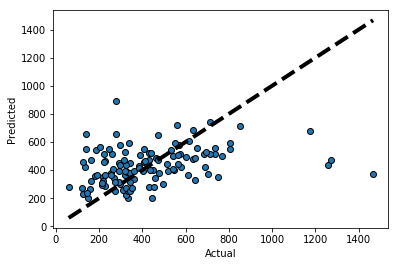

Fraud
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.17097205598838627 seconds
MOST IMPORTANT FEATURES:
total_tweeters 0.15074887208
TF-IDF Fraud 0.14473954726
Opal Fraud 0.120454369934
instagrammers_ratio 0.117441425765
tr_tweeters 0.0719604678809
ja_tweeters 0.0705363098793
tl_tweeters 0.0562350871236
replyers_per_capita 0.0438483267352
Polr_Neg_A_pcapita 0.0347703447497
in_tweeters 0.0323488392849
link_tweets_ratio 0.0302293285022
Prof_exists_pcapita 0.0292448614562
Afternoon_pcapita 0.0235373422992
Polr_Neg_N_pcapita 0.0157212402797
Morning_pcapita 0.0142704053315
Evening_pcapita 0.0132467285839
Polr_Neg_M_pcapita 0.0118658665731
Night_pcapita 0.01095193

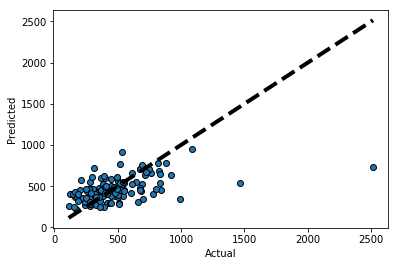

Sexual Offences
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.1647918268572539 seconds
MOST IMPORTANT FEATURES:
TF-IDF Sexual Offences 0.277028448544
instagrammers_ratio 0.114506660768
replyers_per_capita 0.0994515761562
Night_pcapita 0.0658109798708
total_tweeters 0.061103152375
Polr_Neg_N_pcapita 0.0459640910833
link_tweets_ratio 0.0452923998962
Prof_exists_pcapita 0.0438713451802
Polr_Neg_E_pcapita 0.0418487068832
Evening_pcapita 0.0366516838379
Polr_Neg_A_pcapita 0.036059975753
Morning_pcapita 0.0277279754769
Afternoon_pcapita 0.0235380544152
tl_tweeters 0.0208160635556
Polr_Neg_M_pcapita 0.0187740335591
in_tweeters 0.0179213440409
tr_tweeters 0.0090687

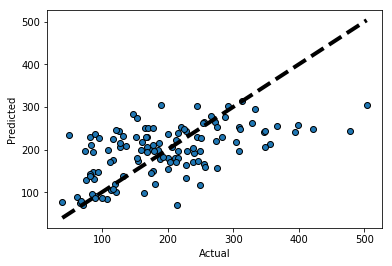

Malicious damage to property
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.1608978738076985 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.2079080677
TF-IDF Malicious damage to property 0.144731920358
Morning_pcapita 0.0862902511233
replyers_per_capita 0.0599038677908
link_tweets_ratio 0.0517732108429
tl_tweeters 0.0515777677979
Polr_Neg_A_pcapita 0.0503572341149
Evening_pcapita 0.0475621212909
Afternoon_pcapita 0.0454963668881
Night_pcapita 0.0450903326541
Polr_Neg_N_pcapita 0.0371799151408
Prof_exists_pcapita 0.0362964765306
total_tweeters 0.0307613716676
Polr_Neg_E_pcapita 0.0289050033994
Polr_Neg_M_pcapita 0.0261805500853
in_tweeters 0.022522624

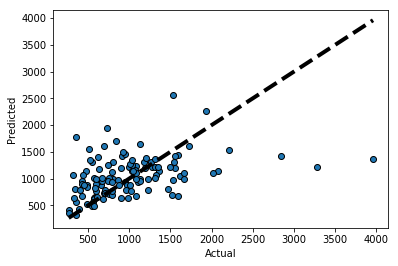

Prohibited weapons offences
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.1626091180369258 seconds
MOST IMPORTANT FEATURES:
TF-IDF Prohibited weapons offences 0.254697884122
total_tweeters 0.157370274094
instagrammers_ratio 0.118076317416
replyers_per_capita 0.0793688101379
tl_tweeters 0.0682314363722
Polr_Neg_A_pcapita 0.0459443129155
Polr_Neg_N_pcapita 0.0333061829152
link_tweets_ratio 0.0294926416776
Afternoon_pcapita 0.0267513557716
Night_pcapita 0.026620730465
Prof_exists_pcapita 0.0262251617393
Opal Prohibited weapons offences 0.0227436244327
in_tweeters 0.0221447177142
Polr_Neg_M_pcapita 0.0206002273993
Polr_Neg_E_pcapita 0.0202651931895
Evening_pcap

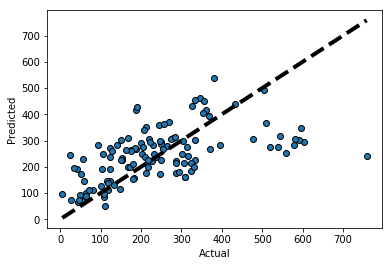

In [133]:
output = pd.DataFrame()
print('RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF AND OPAL.')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = derived_features.tolist() + ['TF-IDF '+crime] + ['Opal '+crime]
    y_cols = ['LGA',crime]
    X = derived[X_cols]
    y = targets[y_cols]
    preds, importants = rfr_cv(X, y, folds=10)
    end = timer()
    print('Finished 10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    if len(output.columns) == 0:
        output['LGA'] = preds['LGA']
    output['TFIDF+OPAL+DERIVED '+crime] = preds[preds.columns[-1]]

In [134]:
output.to_csv("../../data/clean/ensemble_tfidf_opal_17_rfr_preds.csv",index=False)

DERIVED FEATURES RFR:
Assault - domestic violence
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.1626734498422593 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.162712210381
total_tweeters 0.108012123206
replyers_per_capita 0.0870661179588
tl_tweeters 0.0823397963884
Polr_Neg_N_pcapita 0.068141875118
Polr_Neg_M_pcapita 0.0680643933302
Night_pcapita 0.0631663633723
Polr_Neg_A_pcapita 0.0564704543068
Morning_pcapita 0.0534532646209
Prof_exists_pcapita 0.048956876713
Evening_pcapita 0.0467948582311
link_tweets_ratio 0.04516270207
Polr_Neg_E_pcapita 0.0378347706289
Afternoon_pcapita 0.0365147559218
in_tweeters 0.0236050288272
tr_tweeters 0.00640617318548

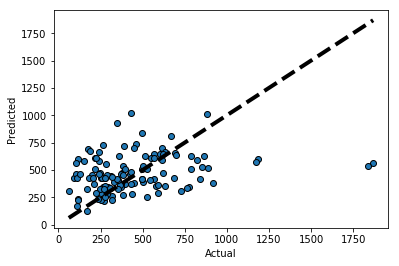

Assault - non-domestic violence
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.16924250614829361 seconds
MOST IMPORTANT FEATURES:
total_tweeters 0.104417488048
instagrammers_ratio 0.100628909107
Morning_pcapita 0.0900041557393
replyers_per_capita 0.0885416062955
Polr_Neg_A_pcapita 0.0871303796779
Night_pcapita 0.0672066014537
Evening_pcapita 0.0668806790815
Afternoon_pcapita 0.0666939927673
tl_tweeters 0.052938133751
link_tweets_ratio 0.0491299901396
in_tweeters 0.0490832895093
Polr_Neg_M_pcapita 0.0426311716206
Polr_Neg_E_pcapita 0.0375758635111
Polr_Neg_N_pcapita 0.0356245820684
Prof_exists_pcapita 0.0336778547323
ja_tweeters 0.0217635821678
tr_tweeters 0.

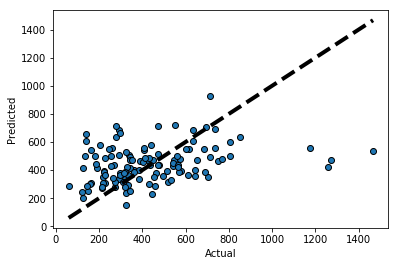

Fraud
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.1678303498774767 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.195171220144
ja_tweeters 0.177953301773
total_tweeters 0.160176251524
tr_tweeters 0.094101495424
tl_tweeters 0.068436715876
replyers_per_capita 0.04738146498
link_tweets_ratio 0.0436018446953
Polr_Neg_A_pcapita 0.03555619646
in_tweeters 0.033546518123
Prof_exists_pcapita 0.0287633544029
Afternoon_pcapita 0.0268507916195
Polr_Neg_N_pcapita 0.0211534817843
Evening_pcapita 0.0193566977461
Night_pcapita 0.0140052231333
Polr_Neg_E_pcapita 0.0115097407083
Morning_pcapita 0.0112925347405
Polr_Neg_M_pcapita 0.0111431668655
R2: 0.283686881252
R

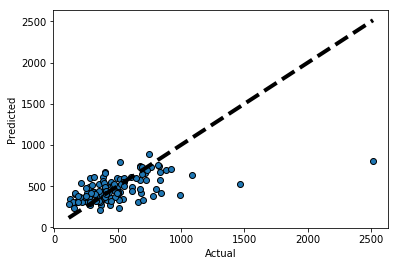

Sexual Offences
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.17162399180233479 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.275564895917
replyers_per_capita 0.128539556877
Night_pcapita 0.0873776275972
total_tweeters 0.0784482176096
link_tweets_ratio 0.061431357043
Polr_Neg_E_pcapita 0.0522895445598
Polr_Neg_N_pcapita 0.0471501399095
Prof_exists_pcapita 0.0412368153257
Evening_pcapita 0.0371552459705
Polr_Neg_A_pcapita 0.0344817706632
Morning_pcapita 0.0288064647473
Afternoon_pcapita 0.0277555486597
Polr_Neg_M_pcapita 0.0270486574412
tl_tweeters 0.0249114768392
in_tweeters 0.0243706967838
tr_tweeters 0.0126527990909
ja_tweeters 0.010779184965
R2:

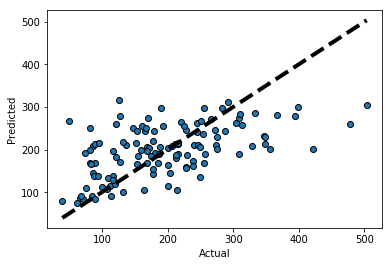

Malicious damage to property
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.16550083598122 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.223494208952
Morning_pcapita 0.103979784324
replyers_per_capita 0.0761356504699
Night_pcapita 0.0688782781806
tl_tweeters 0.0640811556309
Evening_pcapita 0.056363510276
total_tweeters 0.0555126906937
Afternoon_pcapita 0.0536489211532
link_tweets_ratio 0.05289087833
Polr_Neg_A_pcapita 0.0479940754608
Polr_Neg_N_pcapita 0.0476407026398
Prof_exists_pcapita 0.0379918936574
Polr_Neg_M_pcapita 0.0341086429773
Polr_Neg_E_pcapita 0.030512517179
in_tweeters 0.0293726337909
tr_tweeters 0.00937368936241
ja_tweeters 0.00802076

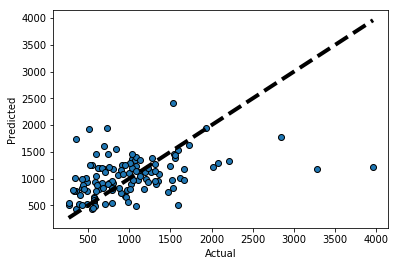

Prohibited weapons offences
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.16115535399876535 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.231663357075
total_tweeters 0.221939030727
replyers_per_capita 0.129896087303
tl_tweeters 0.0685450483651
Polr_Neg_A_pcapita 0.0567890161857
Polr_Neg_N_pcapita 0.0385999523903
Afternoon_pcapita 0.031154575043
Prof_exists_pcapita 0.0307136923394
Polr_Neg_E_pcapita 0.0292079690442
Night_pcapita 0.0281917613259
link_tweets_ratio 0.0277299648481
in_tweeters 0.0209348557818
Polr_Neg_M_pcapita 0.0200775209766
Evening_pcapita 0.0194377022213
ja_tweeters 0.0193691225742
Morning_pcapita 0.0178735239133
tr_tweeters 0.00787

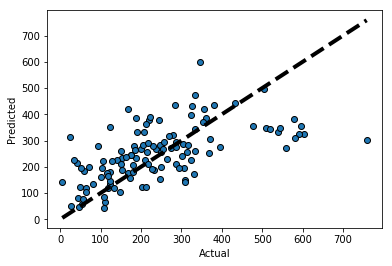

In [26]:
output = pd.DataFrame()
print('DERIVED FEATURES RFR:')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = derived_features.tolist()
    y_cols = ['LGA',crime]
    X = derived[X_cols]
    y = targets[y_cols]
    preds, importants = rfr_cv(X, y, folds=10)
    end = timer()
    print('Finished 10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    if len(output.columns) == 0:
        output['LGA'] = preds['LGA']
    output['DERIVED '+crime] = preds[preds.columns[-1]]

In [27]:
output.to_csv("../../data/clean/17_derived_features_rfr_preds.csv",index=False)

Combine all derived features, demographic features, and tf-idf prediciton into an ensamble model.

In [142]:
demog = pd.read_csv(os.path.join(base, 'baseline_12_features.csv')).iloc[:,1:]
demog = demog.rename(columns={'lga': 'LGA'})
demog_features = demog.columns[0:-1]
print(demog_features)

demog = derived.merge(demog, on='LGA')
demog = demog.sort_values(by=['LGA'])
# SCALE:
demog[demog.columns[1:]] = scaler.fit_transform(demog[demog.columns[1:]])
demog

Index(['Percent_Unem_loyment_P_G40', 'Median_age_persons_G02',
       'Median_mortgage_repay_monthly_G02', 'Median_rent_weekly_G02',
       'Median_tot_hhd_inc_weekly_G02', 'Per_lone_par', 'Num_sep_males',
       'Pop_density', 'Per_no_relg', 'Per_immi', 'Per_english', 'Per_Voc'],
      dtype='object')


,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_pcapita,Polr_Neg_N_pcapita,Polr_Neg_E_pcapita,Polr_Neg_M_pcapita,Night_pcapita,...,Median_mortgage_repay_monthly_G02,Median_rent_weekly_G02,Median_tot_hhd_inc_weekly_G02,Per_lone_par,Num_sep_males,Pop_density,Per_no_relg,Per_immi,Per_english,Per_Voc
0,Albury,0.466554,0.416775,0.197563,0.287275,0.949488,0.782715,0.904756,0.838731,0.462604,...,0.273878,0.209434,0.217708,0.0,0.545986,0.021413,0.455354,0.169855,0.910412,0.882425
1,Armidale Regional,0.516683,0.218445,0.075966,0.502525,0.973118,0.942828,0.975102,0.916538,0.222867,...,0.262449,0.245283,0.211458,0.0,0.397525,0.000425,0.453453,0.205078,0.885233,0.386698
2,Ballina,0.817410,0.251528,0.177599,0.541787,0.990969,0.966247,0.982749,0.964972,0.145025,...,0.401224,0.415094,0.202604,0.0,0.491028,0.011047,0.535251,0.094077,0.949884,0.657809
3,Bathurst Regional,0.655755,0.287248,0.154265,0.426547,0.989730,0.929267,0.970807,0.914123,0.169113,...,0.375510,0.301887,0.282812,0.0,0.491999,0.001375,0.311942,0.067908,0.918670,0.596823
4,Bayside,0.058921,0.095517,0.196267,0.232176,0.997295,0.985543,0.992496,0.986980,0.033190,...,0.673469,0.641509,0.447396,0.0,0.365273,0.401445,0.258616,0.691874,0.240357,0.736324
5,Bega Valley,0.663016,0.295896,0.120819,0.603503,0.992500,0.959067,0.976427,0.958316,0.166398,...,0.242041,0.245283,0.114063,0.0,0.667893,0.000667,0.671224,0.106005,0.956698,0.441845
6,Bellingen,0.764571,0.210004,0.047446,0.854408,0.995781,0.975773,0.981771,0.977130,0.145192,...,0.265306,0.301887,0.119792,0.0,0.652684,0.001003,0.798436,0.118716,0.969164,0.567172
7,Berrigan,0.498711,0.238779,0.023075,0.323752,0.981020,0.935332,0.989018,0.945081,0.168365,...,0.135918,0.113208,0.104167,0.0,0.616265,0.000513,0.324782,0.060599,0.922197,0.346292
8,Blacktown,0.082964,0.009266,0.086855,0.357704,0.999216,0.998656,0.999174,0.996787,0.005456,...,0.571429,0.490566,0.491667,0.0,0.435003,0.180144,0.104001,0.481686,0.426974,0.598399
9,Bland,0.354794,0.093728,0.004667,0.826193,0.989551,0.962460,0.980747,0.973679,0.045718,...,0.102041,0.056604,0.173437,0.0,0.593415,0.000076,0.072331,0.043375,0.901472,0.288869


RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF PLUS 12 DEMOGRAPHIC FEATURES.
Assault - domestic violence
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.19276878819800913 seconds
MOST IMPORTANT FEATURES:
Pop_density 0.161455529886
Num_sep_males 0.15613112988
Percent_Unem_loyment_P_G40 0.136414778643
Median_mortgage_repay_monthly_G02 0.11685469073
Per_immi 0.0575504308688
Per_english 0.0556394932678
TF-IDF Assault - domestic violence 0.0369567580955
Median_tot_hhd_inc_weekly_G02 0.0337200147045
Per_no_relg 0.0291887448001
Median_rent_weekly_G02 0.02703011014
total_tweeters 0.0247747127069
Median_age_persons_G02 0.0224265601726
Per_Voc 0.0171680020925
replyers_per

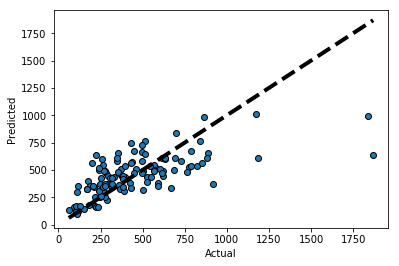

Assault - non-domestic violence
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.1934383751358837 seconds
MOST IMPORTANT FEATURES:
Percent_Unem_loyment_P_G40 0.230556561667
Median_mortgage_repay_monthly_G02 0.130025574521
Pop_density 0.0911513333928
Num_sep_males 0.0557095887505
Per_no_relg 0.0546804408099
Median_rent_weekly_G02 0.041440500293
total_tweeters 0.0404855468412
Polr_Neg_A_pcapita 0.0318060665247
Per_english 0.0308449301277
TF-IDF Assault - non-domestic violence 0.0285669788945
Afternoon_pcapita 0.0273227188816
Per_Voc 0.0254491565815
Per_immi 0.0242638586152
instagrammers_ratio 0.0195255161156
Median_tot_hhd_inc_weekly_G02 0.0192516224956
Polr_Neg

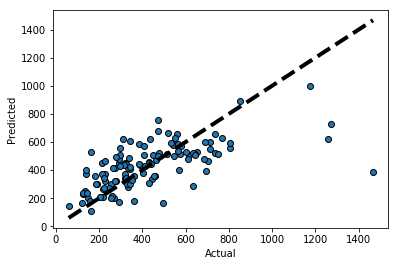

Fraud
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.21344442502595484 seconds
MOST IMPORTANT FEATURES:
Median_age_persons_G02 0.228220989982
Pop_density 0.113099524
total_tweeters 0.090432694756
Per_english 0.0881876080717
Percent_Unem_loyment_P_G40 0.0667987289416
TF-IDF Fraud 0.0612104009159
Per_no_relg 0.0428333460533
ja_tweeters 0.0386062335709
tr_tweeters 0.0283771785205
tl_tweeters 0.0276386028904
Per_immi 0.0257327886616
replyers_per_capita 0.0213771162148
in_tweeters 0.0212631584592
Median_tot_hhd_inc_weekly_G02 0.0179528979022
Per_Voc 0.0169208938997
Num_sep_males 0.0134838618804
Median_rent_weekly_G02 0.012227120889
Prof_exists_pcapita 0.011942733

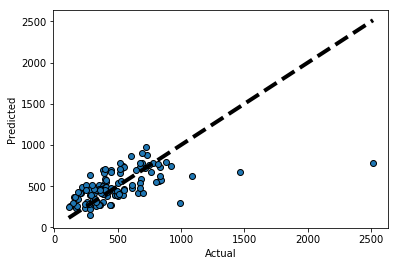

Sexual Offences
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.19265331607311964 seconds
MOST IMPORTANT FEATURES:
Median_mortgage_repay_monthly_G02 0.220966171017
Num_sep_males 0.159380288216
Median_rent_weekly_G02 0.0828885969589
Percent_Unem_loyment_P_G40 0.0726288142182
Median_age_persons_G02 0.0639383116556
Median_tot_hhd_inc_weekly_G02 0.0446821616559
Per_english 0.0309675226767
instagrammers_ratio 0.0279352950466
link_tweets_ratio 0.0273529203828
Per_immi 0.0235432378635
Per_no_relg 0.0208564277886
Polr_Neg_N_pcapita 0.0206690573256
TF-IDF Sexual Offences 0.0199439382402
Per_Voc 0.0187806151539
replyers_per_capita 0.0183517769278
Pop_density 0.01760745

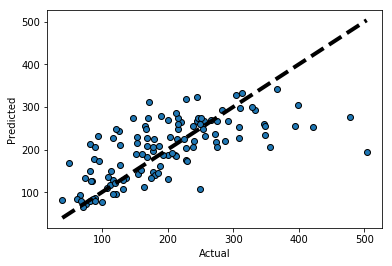

Malicious damage to property
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.18738714000210166 seconds
MOST IMPORTANT FEATURES:
Median_mortgage_repay_monthly_G02 0.248137384472
Percent_Unem_loyment_P_G40 0.137021263694
Pop_density 0.114776306928
Per_english 0.0694744186864
Num_sep_males 0.0600279021976
Median_rent_weekly_G02 0.0513097238036
Median_age_persons_G02 0.0443800674638
Per_immi 0.0410450820348
instagrammers_ratio 0.0317458603809
Per_no_relg 0.0254677664335
link_tweets_ratio 0.0213462148478
Per_Voc 0.0163521788917
Night_pcapita 0.0137810512316
Median_tot_hhd_inc_weekly_G02 0.013102087013
Morning_pcapita 0.0127259482192
TF-IDF Malicious damage to prop

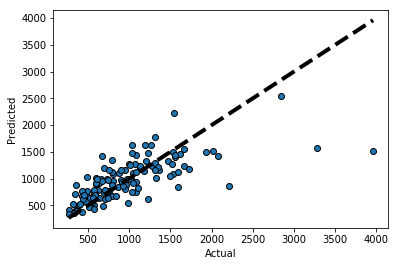

Prohibited weapons offences
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.1901459088549018 seconds
MOST IMPORTANT FEATURES:
Median_rent_weekly_G02 0.32231492523
Pop_density 0.137061495231
Per_english 0.078068754914
Num_sep_males 0.07730978152
Per_Voc 0.0663867019347
Median_mortgage_repay_monthly_G02 0.0538968713515
Median_age_persons_G02 0.0311604515078
instagrammers_ratio 0.0283969904472
Per_immi 0.0237169628461
total_tweeters 0.0217581571216
TF-IDF Prohibited weapons offences 0.0170027886806
Median_tot_hhd_inc_weekly_G02 0.0163296020683
tl_tweeters 0.0151713196708
Polr_Neg_N_pcapita 0.0133076626713
Night_pcapita 0.0122993811328
Percent_Unem_loyment_P_G40 

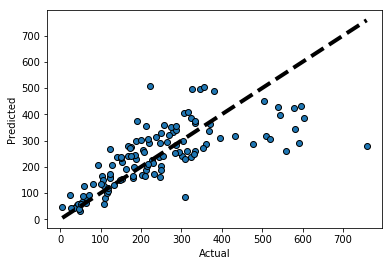

In [29]:
output = pd.DataFrame()
print('RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF PLUS 12 DEMOGRAPHIC FEATURES.')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = demog_features.tolist() + derived_features.tolist() + ['TF-IDF '+crime]
    y_cols = ['LGA',crime]
    X = demog[X_cols]
    y = targets[y_cols]
    preds, importants = rfr_cv(X, y, folds=10)
    end = timer()
    print('Finished 10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    if len(output.columns) == 0:
        output['LGA'] = preds['LGA']
    output['ENSEMBLE30 '+crime] = preds[preds.columns[-1]]

In [30]:
output.to_csv("../../data/clean/ensemble_30_features_rfr_preds.csv",index=False)

RFR 12 DEMOGRAPHIC FEATURES ONLY.
Assault - domestic violence
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.160531752044335 seconds
MOST IMPORTANT FEATURES:
Pop_density 0.183859596842
Num_sep_males 0.17879611927
Percent_Unem_loyment_P_G40 0.156654159956
Median_mortgage_repay_monthly_G02 0.128617454535
Per_english 0.0758090287576
Per_immi 0.0720986047986
Median_tot_hhd_inc_weekly_G02 0.0458606248341
Per_no_relg 0.0444140790676
Median_rent_weekly_G02 0.0427105318672
Median_age_persons_G02 0.0376844820447
Per_Voc 0.0334953180276
Per_lone_par 0.0
R2: 0.435707543124
RMSE: 220.310500102
MAPE: 36.9751418565
Mean APE Baseline: 72.0914035637


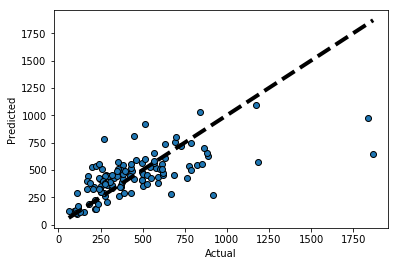

Assault - non-domestic violence
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.17292590206488967 seconds
MOST IMPORTANT FEATURES:
Percent_Unem_loyment_P_G40 0.267451259606
Median_mortgage_repay_monthly_G02 0.158662192682
Pop_density 0.135867908659
Per_no_relg 0.0961640890846
Num_sep_males 0.0664295402432
Median_rent_weekly_G02 0.059746858245
Per_english 0.052041239351
Per_Voc 0.0499150926518
Median_age_persons_G02 0.043500523662
Per_immi 0.0412198688453
Median_tot_hhd_inc_weekly_G02 0.0290014269695
Per_lone_par 0.0
R2: 0.422984412987
RMSE: 184.666573148
MAPE: 33.4462175251
Mean APE Baseline: 59.8326771602


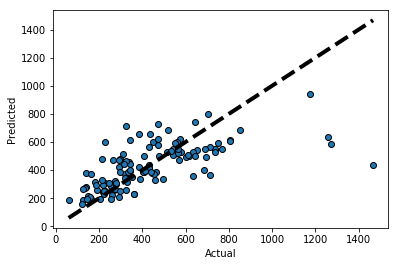

Fraud
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.19827300496399403 seconds
MOST IMPORTANT FEATURES:
Median_age_persons_G02 0.270408354265
Pop_density 0.224312754762
Per_english 0.106069340129
Per_no_relg 0.0973706930659
Percent_Unem_loyment_P_G40 0.0973168678923
Num_sep_males 0.0470656789845
Per_immi 0.0415656786465
Per_Voc 0.0381011922154
Median_tot_hhd_inc_weekly_G02 0.0350094948779
Median_rent_weekly_G02 0.0291284130144
Median_mortgage_repay_monthly_G02 0.0136515321465
Per_lone_par 0.0
R2: 0.343263737521
RMSE: 234.368882583
MAPE: 35.3365200598
Mean APE Baseline: 50.564378615


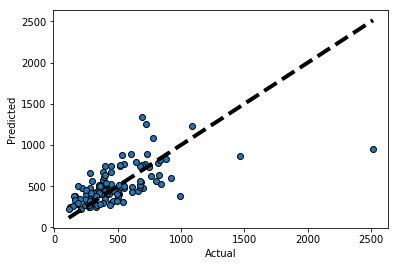

Sexual Offences
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.16775708179920912 seconds
MOST IMPORTANT FEATURES:
Median_mortgage_repay_monthly_G02 0.2383712479
Num_sep_males 0.187751764282
Percent_Unem_loyment_P_G40 0.113836899764
Median_rent_weekly_G02 0.0962589289299
Median_age_persons_G02 0.0799992198904
Median_tot_hhd_inc_weekly_G02 0.0616123110023
Per_english 0.0543747760585
Per_no_relg 0.0455649510751
Per_Voc 0.0417137564974
Per_immi 0.0405867537128
Pop_density 0.039929390888
Per_lone_par 0.0
R2: 0.393733889057
RMSE: 72.686160614
MAPE: 30.9882374681
Mean APE Baseline: 53.0821806583


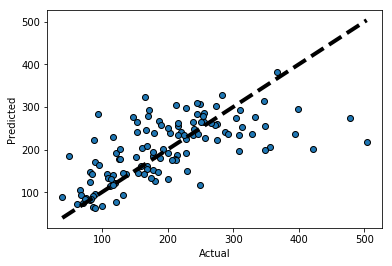

Malicious damage to property
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.1629033419303596 seconds
MOST IMPORTANT FEATURES:
Median_mortgage_repay_monthly_G02 0.262391692461
Percent_Unem_loyment_P_G40 0.169841260959
Pop_density 0.123723244424
Per_english 0.0943744999668
Num_sep_males 0.0785426581111
Median_age_persons_G02 0.0659787911353
Median_rent_weekly_G02 0.0620232484763
Per_immi 0.0474147384477
Per_no_relg 0.0434092930461
Per_Voc 0.031166345871
Median_tot_hhd_inc_weekly_G02 0.0211342271017
Per_lone_par 0.0
R2: 0.52085375791
RMSE: 396.540967719
MAPE: 27.8564756996
Mean APE Baseline: 53.4238936165


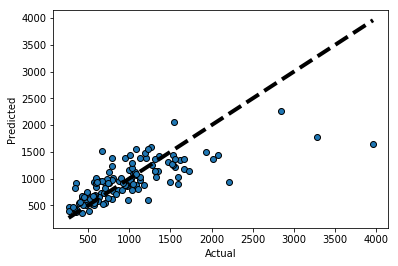

Prohibited weapons offences
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.18293813103809953 seconds
MOST IMPORTANT FEATURES:
Median_rent_weekly_G02 0.336571521935
Pop_density 0.156408908386
Num_sep_males 0.105823299408
Per_english 0.0997534233668
Per_Voc 0.0872800653197
Median_mortgage_repay_monthly_G02 0.0638198695906
Median_age_persons_G02 0.0435554246301
Per_immi 0.0400299037853
Median_tot_hhd_inc_weekly_G02 0.0273248214219
Percent_Unem_loyment_P_G40 0.0210384621081
Per_no_relg 0.0183943000479
Per_lone_par 0.0
R2: 0.50430085365
RMSE: 105.02019707
MAPE: 41.1319275205
Mean APE Baseline: 126.659859832


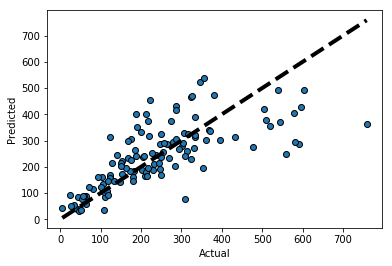

In [17]:
output = pd.DataFrame()
print('RFR 12 DEMOGRAPHIC FEATURES ONLY.')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = demog_features.tolist()
    y_cols = ['LGA',crime]
    X = demog[X_cols]
    y = targets[y_cols]
    preds, importants = rfr_cv(X, y, folds=10)
    end = timer()
    print('Finished 10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    if len(output.columns) == 0:
        output['LGA'] = preds['LGA']
    output['Demog '+crime] = preds[preds.columns[-1]]

In [19]:
output.to_csv("../../data/clean/demographics_rfr_preds.csv",index=False)

Ensembling improves 2 crimes and makes 4 worse on MAPE. Starting with demographics, try forward feature selection, keeping track of mean MAPE across all 6 crimes.

In [139]:
# Generates mean MAPE and std deviation across 6 crime types
def mmape_score(X, y, features, folds=10, n=4):
    mmapes = np.zeros(n)
    for i in np.arange(n):
        mmape = 0
        for crime in crimes:
            X_cols = ['TF-IDF '+crime if col=='TF-IDF' else col for col in features]
            X_cols = ['Opal '+crime if col=='Opal' else col for col in X_cols]
            preds, _ = rfr_cv(X[X_cols], y[['LGA',crime]], folds=folds, verbose=False, random_state=None)
            mmape += mape(preds.iloc[:,-2], preds.iloc[:,-1])
        mmapes[i] = mmape / len(crimes)
    return np.mean(mmapes), np.std(mmapes)

In [32]:
np.random.seed(2018)
selected = []
demog_mmape = mmape_score(demog, targets, demog_features.tolist())
print('Mean MAPE score for 12 demographic features',demog_mmape)
# Append a pseudo-feature for TF-IDF score. Ugly but necessary.
remaining = demog_features.tolist() + derived_features.tolist() + ['TF-IDF']
mmapes = []
while len(remaining) > 0:
    start = timer()
    min_score = 1e+10
    for feat in remaining:
        fscore, sigma = mmape_score(demog, targets, selected + [feat])
        if fscore < min_score:
            min_score = fscore
            best_sigma = sigma
            best_feat = feat
    remaining.remove(best_feat)
    selected.append(best_feat)
    mmapes.append((min_score, best_sigma))
    end = timer()
    print('Selected', best_feat, 'with MMAPE', mmapes[-1], 'in', end-start,'seconds.')

Mean MAPE score for 12 demographic features (33.931165220284079, 0.29935008872774066)
Selected Pop_density with MMAPE (47.374957729155717, 0.41962397777748622) in 73.79467028309591 seconds.
Selected Percent_Unem_loyment_P_G40 with MMAPE (37.821702905256039, 0.81576637297964383) in 74.88820377993397 seconds.
Selected Per_no_relg with MMAPE (35.837619173116863, 0.54722995560143339) in 73.83206378505565 seconds.
Selected Per_english with MMAPE (35.352160055371847, 0.71233172091273889) in 72.45800760597922 seconds.
Selected Median_rent_weekly_G02 with MMAPE (34.411580570288272, 0.76941943451051809) in 71.68324089399539 seconds.
Selected Median_age_persons_G02 with MMAPE (34.072286021012886, 0.16985647507442087) in 70.23904299503192 seconds.
Selected tr_tweeters with MMAPE (33.433994728714389, 0.60731194195710858) in 69.5162661280483 seconds.
Selected ja_tweeters with MMAPE (33.291234998163084, 0.54376370392484463) in 67.16403483995236 seconds.
Selected Afternoon_pcapita with MMAPE (33.1927

In [33]:
print(selected)
scores, sigmas = zip(*mmapes)
print(mmapes)

['Pop_density', 'Percent_Unem_loyment_P_G40', 'Per_no_relg', 'Per_english', 'Median_rent_weekly_G02', 'Median_age_persons_G02', 'tr_tweeters', 'ja_tweeters', 'Afternoon_pcapita', 'Night_pcapita', 'Num_sep_males', 'Median_mortgage_repay_monthly_G02', 'Median_tot_hhd_inc_weekly_G02', 'Per_lone_par', 'tl_tweeters', 'instagrammers_ratio', 'replyers_per_capita', 'in_tweeters', 'Prof_exists_pcapita', 'Polr_Neg_M_pcapita', 'Morning_pcapita', 'Per_immi', 'Polr_Neg_A_pcapita', 'Polr_Neg_E_pcapita', 'link_tweets_ratio', 'Evening_pcapita', 'Per_Voc', 'total_tweeters', 'TF-IDF', 'Polr_Neg_N_pcapita']
[(47.374957729155717, 0.41962397777748622), (37.821702905256039, 0.81576637297964383), (35.837619173116863, 0.54722995560143339), (35.352160055371847, 0.71233172091273889), (34.411580570288272, 0.76941943451051809), (34.072286021012886, 0.16985647507442087), (33.433994728714389, 0.60731194195710858), (33.291234998163084, 0.54376370392484463), (33.192772651892867, 0.40177555296533274), (33.325923095129

['Pop_density', 'Percent_Unem_loyment_P_G40', 'Per_no_relg', 'Per_english', 'Median_rent_weekly_G02', 'Median_age_persons_G02', 'tr_tweeters', 'ja_tweeters', 'Afternoon_pcapita', 'Night_pcapita', 'Num_sep_males', 'Median_mortgage_repay_monthly_G02', 'Median_tot_hhd_inc_weekly_G02', 'Per_lone_par', 'tl_tweeters', 'instagrammers_ratio']
RFR OPTIMISED ENSEMBLE : BEST 16 FEATURES.
Assault - domestic violence
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.16722145397216082 seconds
MOST IMPORTANT FEATURES:
Num_sep_males 0.183776306488
Pop_density 0.183691882459
Percent_Unem_loyment_P_G40 0.153575342023
Median_mortgage_repay_monthly_G02 0.13056203941
Per_english 0.

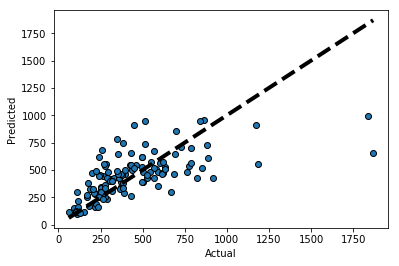

Assault - non-domestic violence
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.1626469970215112 seconds
MOST IMPORTANT FEATURES:
Percent_Unem_loyment_P_G40 0.256244453678
Median_mortgage_repay_monthly_G02 0.156208722856
Pop_density 0.130227058108
Per_no_relg 0.0794182400598
Num_sep_males 0.0693644404572
Afternoon_pcapita 0.0508046760778
Median_rent_weekly_G02 0.0483145755181
Night_pcapita 0.0379527451197
Per_english 0.0366027680094
instagrammers_ratio 0.0347202765063
Median_tot_hhd_inc_weekly_G02 0.0295075479651
ja_tweeters 0.0241465678796
tl_tweeters 0.0212095736507
Median_age_persons_G02 0.0211077305352
tr_tweeters 0.00417062357883
Per_lone_par 0.0
R2: 0.4

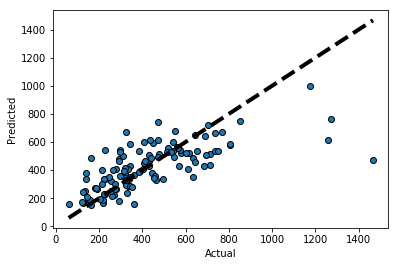

Fraud
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.16144781606271863 seconds
MOST IMPORTANT FEATURES:
Median_age_persons_G02 0.247436257112
Pop_density 0.15712801495
ja_tweeters 0.107117569305
Per_english 0.102412985701
Percent_Unem_loyment_P_G40 0.0762371310561
Per_no_relg 0.0728149807209
tr_tweeters 0.0486391566016
tl_tweeters 0.0477375363192
Num_sep_males 0.0323377045995
Median_tot_hhd_inc_weekly_G02 0.0242600718514
Afternoon_pcapita 0.0231876270083
Median_rent_weekly_G02 0.0229024994314
instagrammers_ratio 0.015389873221
Night_pcapita 0.0124591137239
Median_mortgage_repay_monthly_G02 0.00993947839769
Per_lone_par 0.0
R2: 0.364079271971
RMSE: 230.624765

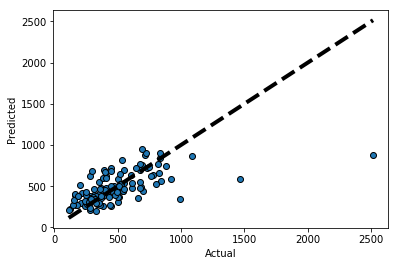

Sexual Offences
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.16910279099829495 seconds
MOST IMPORTANT FEATURES:
Median_mortgage_repay_monthly_G02 0.236408027714
Num_sep_males 0.174727884006
Percent_Unem_loyment_P_G40 0.0978211205999
Median_rent_weekly_G02 0.092179883099
Median_age_persons_G02 0.0744064792693
Median_tot_hhd_inc_weekly_G02 0.0633450672521
Per_english 0.0484371242096
instagrammers_ratio 0.0448780944089
Per_no_relg 0.0389465984272
Night_pcapita 0.0350364352557
Afternoon_pcapita 0.0328883970788
Pop_density 0.030348473184
tl_tweeters 0.0187742077787
tr_tweeters 0.00787437119568
ja_tweeters 0.00392783652107
Per_lone_par 0.0
R2: 0.391913667578
RMS

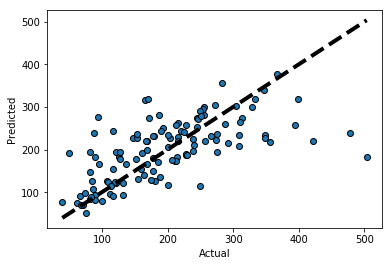

Malicious damage to property
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.1597156401257962 seconds
MOST IMPORTANT FEATURES:
Median_mortgage_repay_monthly_G02 0.269020097669
Percent_Unem_loyment_P_G40 0.161792763504
Pop_density 0.115191090056
Per_english 0.0890637102031
Num_sep_males 0.0736703012145
Median_rent_weekly_G02 0.0589870646784
Median_age_persons_G02 0.0542992733847
Per_no_relg 0.0408446291404
instagrammers_ratio 0.0394355762228
Afternoon_pcapita 0.0336806611143
Night_pcapita 0.0182489704238
Median_tot_hhd_inc_weekly_G02 0.0179874931568
tl_tweeters 0.0173409682727
tr_tweeters 0.00692550270656
ja_tweeters 0.00351189825368
Per_lone_par 0.0
R2: 0.442

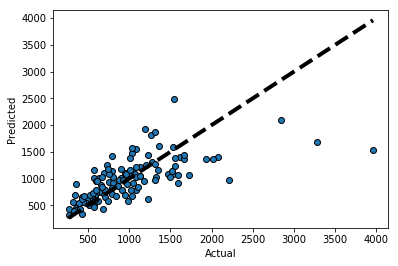

Prohibited weapons offences
Finished processing 12 records...
Finished processing 24 records...
Finished processing 36 records...
Finished processing 48 records...
Finished processing 60 records...
Finished processing 72 records...
Finished processing 84 records...
Finished processing 96 records...
Finished processing 108 records...
Finished processing 120 records...
Finished 10 fold cross validation in 0.15776389208622277 seconds
MOST IMPORTANT FEATURES:
Median_rent_weekly_G02 0.33500382554
Pop_density 0.15238490864
Per_english 0.114815173913
Num_sep_males 0.106673517599
Median_mortgage_repay_monthly_G02 0.0628314006571
instagrammers_ratio 0.0393962863709
Median_age_persons_G02 0.0391365438333
Night_pcapita 0.0354634657318
Median_tot_hhd_inc_weekly_G02 0.0253461099943
tl_tweeters 0.0240973987333
Percent_Unem_loyment_P_G40 0.0212567610576
Per_no_relg 0.0209917378923
Afternoon_pcapita 0.0136166838509
ja_tweeters 0.00520232940812
tr_tweeters 0.00378385677888
Per_lone_par 0.0
R2: 0.523501

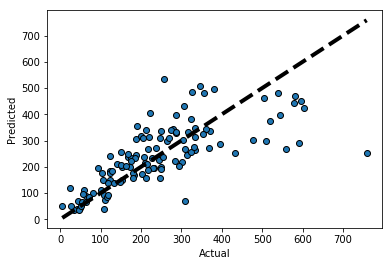

In [37]:
best = selected[:16]
print(best)
output = pd.DataFrame()
output['LGA'] = targets['LGA']
print('RFR OPTIMISED ENSEMBLE : BEST 16 FEATURES.')
np.random.seed(2018)
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = ['TF-IDF '+crime if col=='TF-IDF' else col for col in best]
    y_cols = ['LGA',crime]
    X = demog[X_cols]
    y = targets[y_cols]
    preds, importants = rfr_cv(X, y, folds=10)
    end = timer()
    print('Finished 10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    output['BEST 16 '+crime] = preds[preds.columns[-1]]

In [36]:
output

,LGA,BEST 16 Assault - domestic violence,BEST 16 Assault - non-domestic violence,BEST 16 Fraud,BEST 16 Sexual Offences,BEST 16 Malicious damage to property,BEST 16 Prohibited weapons offences
0,Albury,480.37550,565.37567,520.71162,230.15536,1874.86779,333.25152
1,Armidale Regional,389.83587,535.05937,560.84278,242.45521,968.77450,334.29513
2,Ballina,339.13811,373.00847,310.29657,129.78551,831.14156,148.61789
3,Bathurst Regional,504.33152,328.52697,486.83232,205.64024,965.10264,234.00761
4,Bayside,402.71770,299.59047,722.55975,126.93026,673.14416,91.13416
5,Bega Valley,413.64163,426.00275,388.07799,226.32818,1026.12455,199.44279
6,Bellingen,358.78172,402.71764,435.21590,242.94018,955.60222,196.29594
7,Berrigan,381.81391,381.42499,394.71707,193.90929,1111.36422,342.80743
8,Blacktown,355.09451,340.52230,774.17128,139.91371,589.22628,140.83358
9,Bland,780.00640,391.05270,231.20837,219.13679,1181.42350,495.90225


In [38]:
output.to_csv("../../data/clean/ensemble_best_rfr_preds.csv",index=False)

In [39]:
preds

,LGA,Prohibited weapons offences,predicted
7,Berrigan,279.9813,342.80743
11,Blue Mountains,104.1865,174.53157
12,Broken Hill,332.8341,263.21950
23,Cobar,503.7783,461.84016
37,Georges River,112.0872,72.17162
44,Gwydir,431.8438,252.74721
66,Mid-Coast,167.4678,236.95861
67,Mid-Western Regional,313.4031,246.21026
68,Moree Plains,603.3848,423.87642
94,Snowy Monaro Regional,286.1716,328.15255


In [140]:
# Generates mean MAPE and std deviation for one crime type
def score_crime(X, y, features, crime, n=20, folds=10):
    mapes = np.zeros(n)
    for i in np.arange(n):
        X_cols = ['TF-IDF '+crime if col=='TF-IDF' else col for col in features]
        X_cols = ['Opal '+crime if col=='Opal' else col for col in X_cols]
        preds, _ = rfr_cv(X[X_cols], y[['LGA',crime]], folds=folds, verbose=False, random_state=None)
        mapes[i] = mape(preds.iloc[:,-2], preds.iloc[:,-1])
    return mapes

In [87]:
print('RFR BEST CRIME SCORES')
np.random.seed(2018)
best_crime_scores = {}
for crime in crimes:
    scores = score_crime(demog, targets, best, crime, n=100)
    best_crime_scores[crime] = scores
    print(crime,'MEAN:',np.mean(scores),'STD DEV:',np.std(scores))

RFR BEST CRIME SCORES
Assault - domestic violence MEAN: 38.4112261448 STD DEV: 1.67621413237
Assault - non-domestic violence MEAN: 33.1520208612 STD DEV: 1.93681958446
Fraud MEAN: 32.0907194024 STD DEV: 1.60755043615
Sexual Offences MEAN: 28.9344676425 STD DEV: 1.46671084222
Malicious damage to property MEAN: 29.1010481524 STD DEV: 1.72736827056
Prohibited weapons offences MEAN: 39.7225727782 STD DEV: 1.54904153634


In [88]:
print('RFR 12 DEMOGRAPHIC')
np.random.seed(2018)
dem12_crime_scores = {}
for crime in crimes:
    scores = score_crime(demog, targets, demog_features.tolist(), crime, n=100)
    dem12_crime_scores[crime] = scores
    print(crime,'MEAN:',np.mean(scores),'STD DEV:',np.std(scores))

RFR 12 DEMOGRAPHIC
Assault - domestic violence MEAN: 38.0110819738 STD DEV: 2.14636025021
Assault - non-domestic violence MEAN: 33.6217521581 STD DEV: 1.82282052907
Fraud MEAN: 33.1272427013 STD DEV: 1.5887414325
Sexual Offences MEAN: 29.9417838122 STD DEV: 1.32077638998
Malicious damage to property MEAN: 29.4972596118 STD DEV: 1.55078619824
Prohibited weapons offences MEAN: 39.9487249559 STD DEV: 1.85197517483


In [90]:
#unpaired t test
from scipy import stats
for crime in crimes:
    t,p = stats.ttest_ind(dem12_crime_scores[crime], best_crime_scores[crime])
    print("T statistic:",t,"P value:",p)

T statistic: -1.46195144139 P value: 0.145339834065
T statistic: 1.7572609635 P value: 0.0804188695805
T statistic: 4.56307612704 P value: 8.83303462002e-06
T statistic: 5.07798195853 P value: 8.77752640546e-07
T statistic: 1.69824778133 P value: 0.0910318940572
T statistic: 0.931984337186 P value: 0.352479639879


In [101]:
from scipy.stats import t

def crime_ci(crime, sample1, sample2):
    assert len(sample1) == len(sample2)
    
    tstat,p = stats.ttest_ind(sample1, sample2)

    # Calculate the 95% confidence interval
    N1 = len(sample1)
    N2 = len(sample2)
    df = (N1 + N2 - 2)
    std1 = np.std(sample1)
    std2 = np.std(sample2)
    std_N1N2 = np.sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 
    moe = t.ppf(0.975, df) * std_N1N2 * np.sqrt(1/N1 + 1/N2)

    return tstat, p, moe

for crime in crimes:
    print('\n',crime)
    tstat, p, moe = crime_ci(crime, dem12_crime_scores[crime], best_crime_scores[crime])
    diff = np.mean(dem12_crime_scores[crime]) - np.mean( best_crime_scores[crime])
    print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:7.6f}'.format(tstat,p))
    print ('The difference between groups is {:4.3f} [{:4.3f} to {:4.3f}] (mean [95% CI])'.format(diff, diff - moe, diff + moe))



 Assault - domestic violence
The results of the independent t-test are: 
	t-value = -1.462
	p-value = 0.145340
The difference between groups is -0.400 [-0.937 to 0.137] (mean [95% CI])

 Assault - non-domestic violence
The results of the independent t-test are: 
	t-value = 1.757
	p-value = 0.080419
The difference between groups is 0.470 [-0.055 to 0.994] (mean [95% CI])

 Fraud
The results of the independent t-test are: 
	t-value = 4.563
	p-value = 0.000009
The difference between groups is 1.037 [0.591 to 1.482] (mean [95% CI])

 Sexual Offences
The results of the independent t-test are: 
	t-value = 5.078
	p-value = 0.000001
The difference between groups is 1.007 [0.618 to 1.397] (mean [95% CI])

 Malicious damage to property
The results of the independent t-test are: 
	t-value = 1.698
	p-value = 0.091032
The difference between groups is 0.396 [-0.062 to 0.854] (mean [95% CI])

 Prohibited weapons offences
The results of the independent t-test are: 
	t-value = 0.932
	p-value = 0.35248

Include Opal in feature selection to see if it assists, noting that inferred missing values are a problem:

In [143]:
np.random.seed(2018)
selected = []
demog_mmape = mmape_score(demog, targets, demog_features.tolist())
print('Mean MAPE score for 12 demographic features',demog_mmape)
# Append pseudo-features for TF-IDF and Opal scores.
remaining = demog_features.tolist() + derived_features.tolist() + ['TF-IDF', 'Opal']
mmapes = []
while len(remaining) > 15:
    start = timer()
    min_score = 1e+10
    for feat in remaining:
        fscore, sigma = mmape_score(demog, targets, selected + [feat])
        if fscore < min_score:
            min_score = fscore
            best_sigma = sigma
            best_feat = feat
    remaining.remove(best_feat)
    selected.append(best_feat)
    mmapes.append((min_score, best_sigma))
    end = timer()
    print('Selected', best_feat, 'with MMAPE', mmapes[-1], 'in', end-start,'seconds.')

Mean MAPE score for 12 demographic features (33.931165220284079, 0.29935008872774066)
Selected Pop_density with MMAPE (47.374957729155717, 0.41962397777748622) in 78.0467712210957 seconds.
Selected Percent_Unem_loyment_P_G40 with MMAPE (37.718252029573378, 0.67574956986178347) in 79.30090541183017 seconds.
Selected Per_english with MMAPE (36.51991002069326, 0.63307487772656124) in 80.54734042007476 seconds.
Selected Median_rent_weekly_G02 with MMAPE (35.17757768961301, 0.51640689402803164) in 78.52015364612453 seconds.
Selected Median_age_persons_G02 with MMAPE (34.323318185295804, 0.36735837508635055) in 74.89400111697614 seconds.
Selected Median_mortgage_repay_monthly_G02 with MMAPE (33.675167595210446, 0.37480459158670615) in 73.6909552840516 seconds.
Selected tl_tweeters with MMAPE (33.095539891192963, 0.21721353479495106) in 73.9983645461034 seconds.
Selected Per_immi with MMAPE (33.190525506721798, 0.6046735801040678) in 71.00569568295032 seconds.
Selected Num_sep_males with MMAP

In [145]:
print('RFR BEST CRIME SCORES WITH OPAL:')
np.random.seed(2018)
best_crime_scores_2 = {}
for crime in crimes:
    scores = score_crime(demog, targets, selected[:12], crime, n=100)
    best_crime_scores_2[crime] = scores
    print(crime,'MEAN:',np.mean(scores),'STD DEV:',np.std(scores))

RFR BEST CRIME SCORES WITH OPAL:
Assault - domestic violence MEAN: 36.5999920302 STD DEV: 1.63264185292
Assault - non-domestic violence MEAN: 34.2641594173 STD DEV: 1.75247713902
Fraud MEAN: 32.2038928205 STD DEV: 1.47471535981
Sexual Offences MEAN: 29.0706070851 STD DEV: 1.22732310791
Malicious damage to property MEAN: 28.9665117754 STD DEV: 1.52421131695
Prohibited weapons offences MEAN: 42.0116588638 STD DEV: 1.88839598052


In [146]:
for crime in crimes:
    print('\n',crime)
    tstat, p, moe = crime_ci(crime, dem12_crime_scores[crime], best_crime_scores_2[crime])
    diff = np.mean(dem12_crime_scores[crime]) - np.mean( best_crime_scores_2[crime])
    print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:7.6f}'.format(tstat,p))
    print ('The difference between groups is {:4.3f} [{:4.3f} to {:4.3f}] (mean [95% CI])'.format(diff, diff - moe, diff + moe))


 Assault - domestic violence
The results of the independent t-test are: 
	t-value = 5.206
	p-value = 0.000000
The difference between groups is 1.411 [0.879 to 1.943] (mean [95% CI])

 Assault - non-domestic violence
The results of the independent t-test are: 
	t-value = -2.528
	p-value = 0.012258
The difference between groups is -0.642 [-1.141 to -0.144] (mean [95% CI])

 Fraud
The results of the independent t-test are: 
	t-value = 4.238
	p-value = 0.000035
The difference between groups is 0.923 [0.496 to 1.351] (mean [95% CI])

 Sexual Offences
The results of the independent t-test are: 
	t-value = 4.808
	p-value = 0.000003
The difference between groups is 0.871 [0.516 to 1.227] (mean [95% CI])

 Malicious damage to property
The results of the independent t-test are: 
	t-value = 2.429
	p-value = 0.016050
The difference between groups is 0.531 [0.102 to 0.960] (mean [95% CI])

 Prohibited weapons offences
The results of the independent t-test are: 
	t-value = -7.760
	p-value = 0.00000